In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 40.9/235.7 GB disk)


In [ ]:
!yolo train model=yolo11m.pt data="/content/drive/MyDrive/Yolo_Datasets/data.yaml" epochs=25 imgsz=640

100% 38.8M/38.8M [00:00<00:00, 47.5MB/s]
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/drive/MyDrive/Yolo_Datasets/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [ ]:
!yolo val model="/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/Yolo_Datasets/data.yaml"

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo_Datasets/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:17<00:00,  2.10it/s]
                   all        576        400      0.952      0.919      0.947      0.763
                 Paper        132        139      0.941       0.92      0.943      0.767
                  Rock        121        141      0.958      0.929      0.948      0.754
              Scissors        116        120      0.956      0.908      0.949      0.769
Speed: 0.6ms preprocess, 24.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def show_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return
    cv2_imshow(image)

In [ ]:
!yolo predict model="/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/Yolo_Datasets/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg"

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /content/drive/MyDrive/Yolo_Datasets/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg: 640x640 2 Rocks, 36.8ms
Speed: 2.6ms preprocess, 36.8ms inference, 201.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


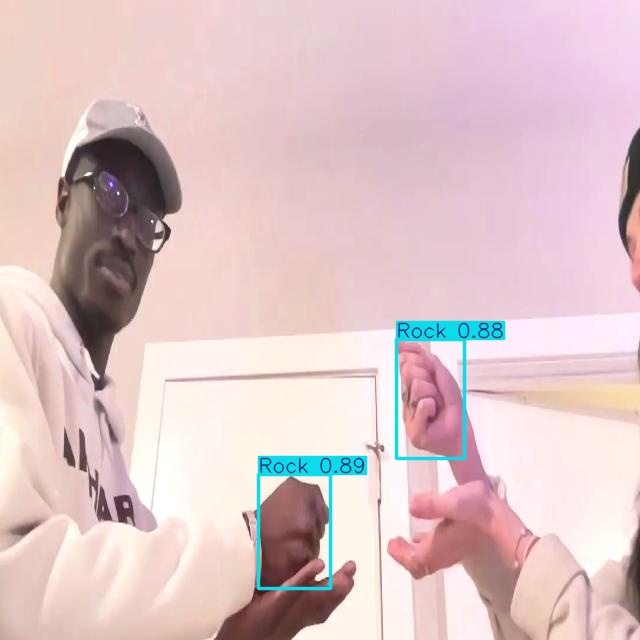

In [ ]:
show_image("/content/drive/MyDrive/Yolo_Datasets/runs/detect/predict2/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg")

In [ ]:
!yolo export model="/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt" format=onnx

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (38.6 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 3.1s, saved as '/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.onnx' (76.7 MB)

Export complete (4.5s)
Results saved to /content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.onnx imgsz=640 data=/content/drive/MyDrive/Yolo_Datasets/data.yaml  
Visualize:       https://

In [ ]:
!yolo export model=yolo11n.pt format=engine

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 230.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.4s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 11.7s, saved as 'yolo11n.onnx' (10.2 MB)
requirements: Ultralytics requirement ['tensorrt>7.0.0,!=10.1.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
from ultralytics import YOLO
model = YOLO('yolo11n.pt')  

results = model.train(data='/content/drive/MyDrive/Yolo_Datasets/data.yaml', epochs=1)

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Yolo_Datasets/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

train: Scanning /content/drive/MyDrive/Yolo_Datasets/train/labels.cache... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolo_Datasets/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1       2.2G      1.306      3.176      1.465          6        640: 100%|██████████| 404/404 [01:10<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.32it/s]


                   all        576        400      0.578      0.479      0.537      0.325

1 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]


                   all        576        400       0.58      0.476      0.537      0.324
                 Paper        132        139      0.556      0.216       0.36       0.18
                  Rock        121        141       0.51       0.73      0.657      0.426
              Scissors        116        120      0.673      0.481      0.594      0.368
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
from ultralytics import YOLO
model1 = YOLO("/content/drive/MyDrive/Yolo_Datasets/runs/detect/train2/weights/best.pt")
source = ""
results = model('/content/drive/MyDrive/Yolo_Datasets/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg')


image 1/1 /content/drive/MyDrive/Yolo_Datasets/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg: 640x640 3 Rocks, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
